In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("collegiate_athlete_injury_dataset.csv")
print(df.head())

  Athlete_ID  Age  Gender  Height_cm  Weight_kg Position  Training_Intensity  \
0       A001   24  Female        195         99   Center                   2   
1       A002   21    Male        192         65  Forward                   8   
2       A003   22    Male        163         83    Guard                   8   
3       A004   24  Female        192         90    Guard                   1   
4       A005   20  Female        173         79   Center                   3   

   Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
0                       13                       2                     3   
1                       14                       1                     3   
2                        8                       2                     1   
3                       13                       1                     1   
4                        9                       1                     2   

   Rest_Between_Events_Days  Fatigue_Score  Performance_Score 

In [8]:
df.shape

(200, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,21.170,2.002787,18.0,19.00,21.0,23.00,24.0
Height_cm,200.0,180.805,11.529598,160.0,171.00,182.5,191.00,199.0
Weight_kg,200.0,77.475,12.440789,55.0,67.00,77.5,89.00,99.0
Training_Intensity,200.0,5.105,2.499040,1.0,3.00,5.0,7.00,9.0
Training_Hours_Per_Week,200.0,11.315,4.438952,5.0,7.00,11.0,15.00,19.0
Recovery_Days_Per_Week,200.0,1.985,0.811212,1.0,1.00,2.0,3.00,3.0
Match_Count_Per_Week,200.0,2.385,1.154748,1.0,1.00,2.0,3.00,4.0
Rest_Between_Events_Days,200.0,1.975,0.817137,1.0,1.00,2.0,3.00,3.0
Fatigue_Score,200.0,4.920,2.560543,1.0,3.00,5.0,7.00,9.0
Performance_Score,200.0,74.465,14.636939,50.0,62.00,74.0,86.25,99.0


In [15]:
df.nunique()

Athlete_ID                  200
Age                           7
Gender                        2
Height_cm                    39
Weight_kg                    45
Position                      3
Training_Intensity            9
Training_Hours_Per_Week      15
Recovery_Days_Per_Week        3
Match_Count_Per_Week          4
Rest_Between_Events_Days      3
Fatigue_Score                 9
Performance_Score            49
Team_Contribution_Score      49
Load_Balance_Score           31
ACL_Risk_Score               73
Injury_Indicator              2
dtype: int64

In [43]:
gender_distribution = df['Gender'].value_counts(normalize=True)
print("Proportion of Genders:")
print(gender_distribution)

Proportion of Genders:
Gender
Female    0.535
Male      0.465
Name: proportion, dtype: float64


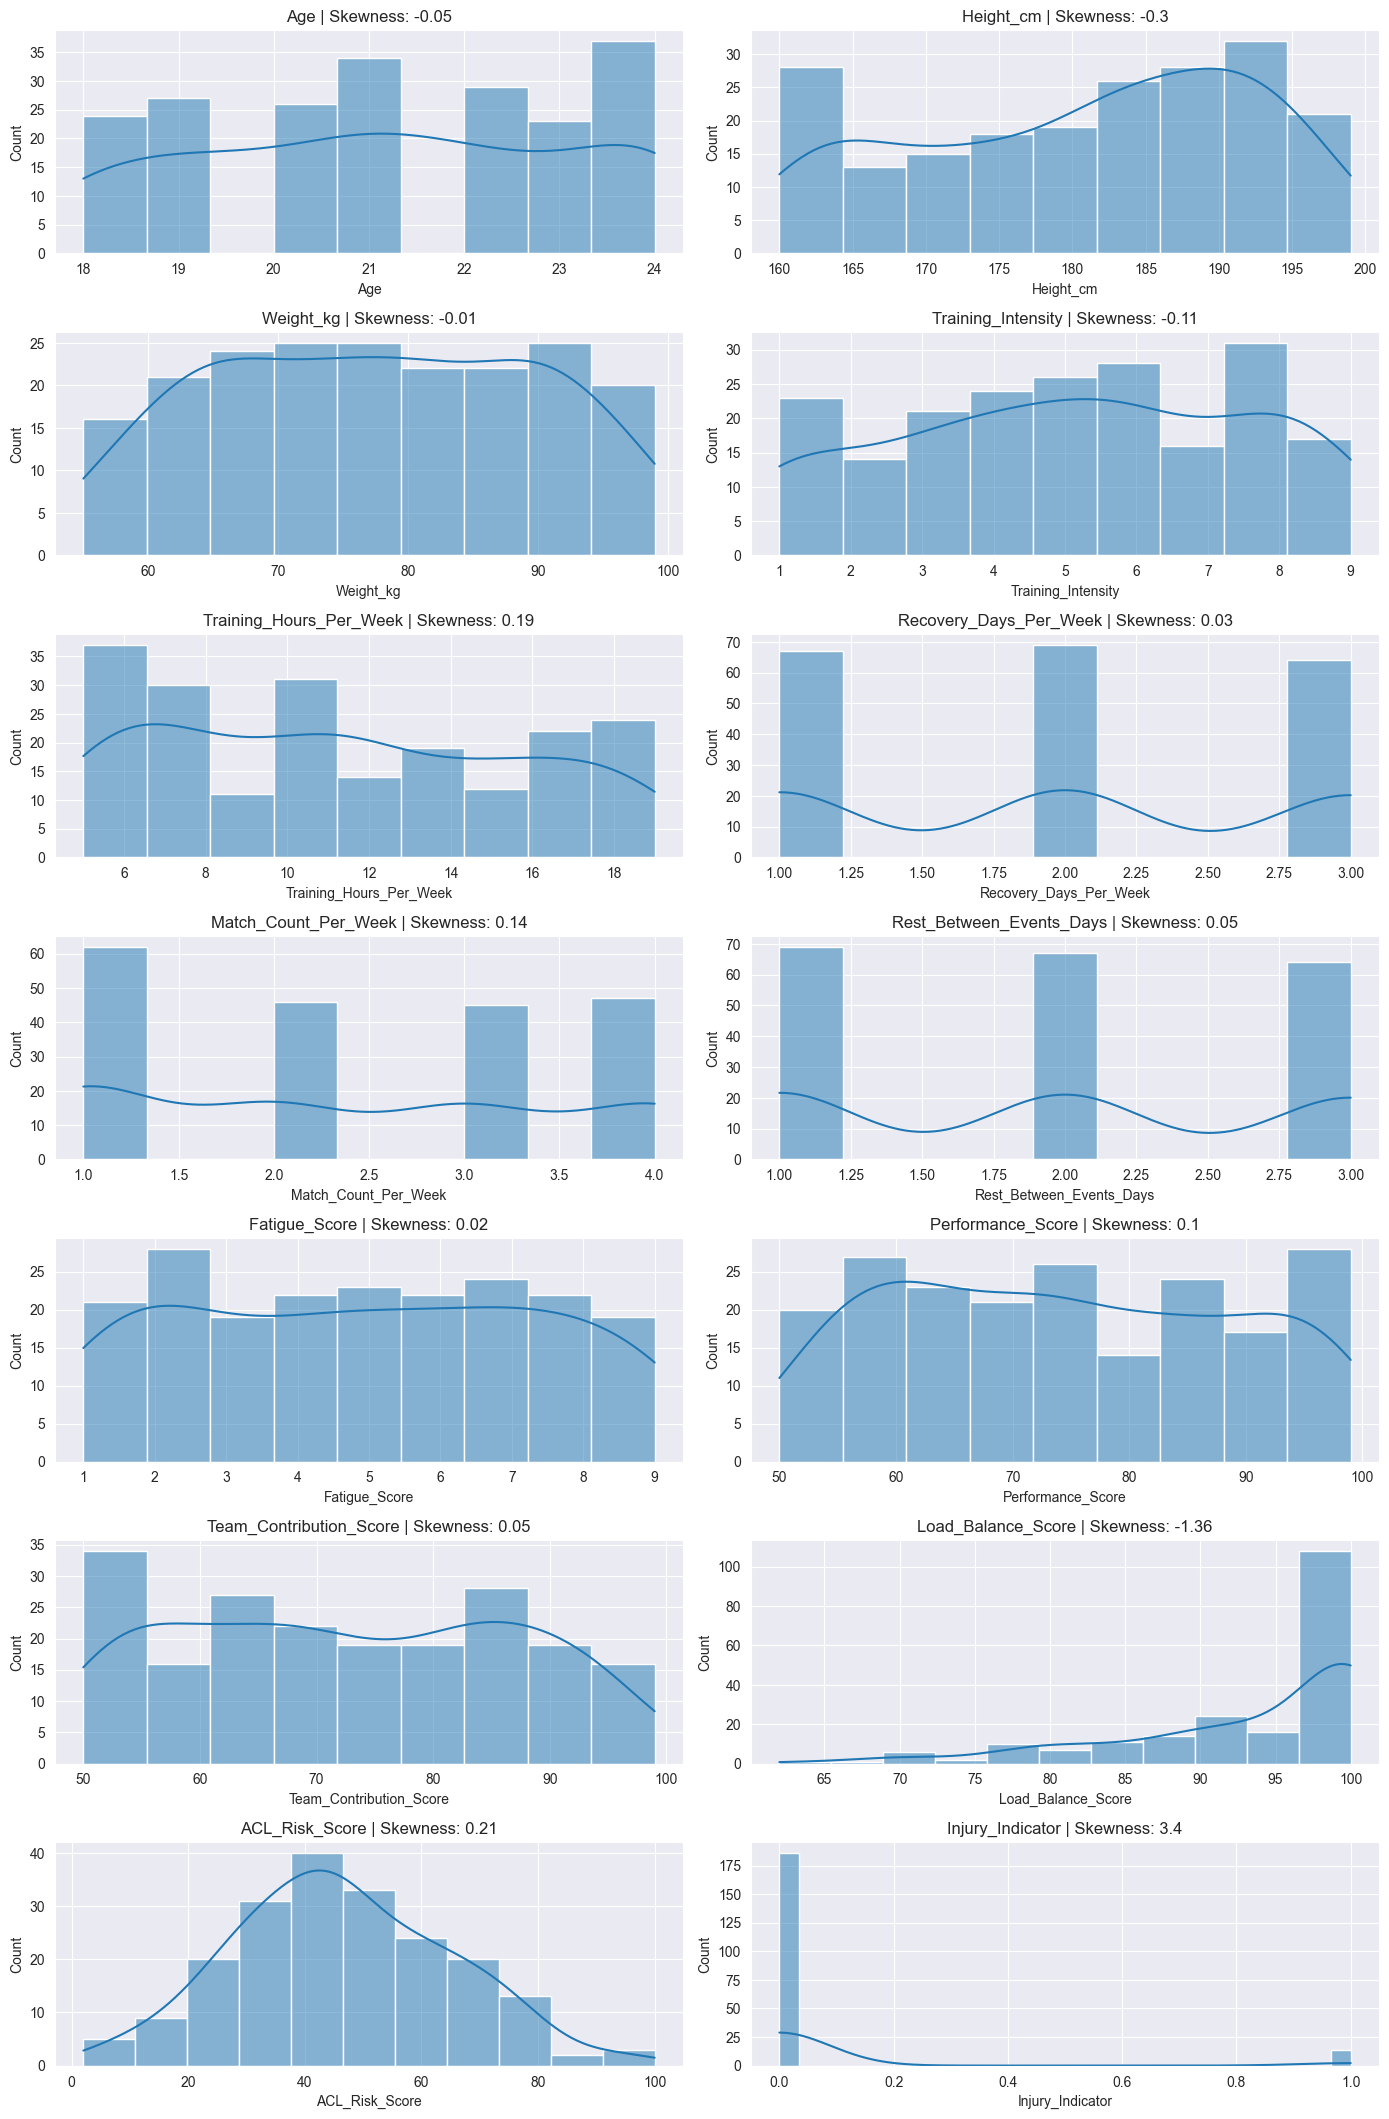

In [16]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

<Axes: xlabel='ACL_Risk_Score', ylabel='Position'>

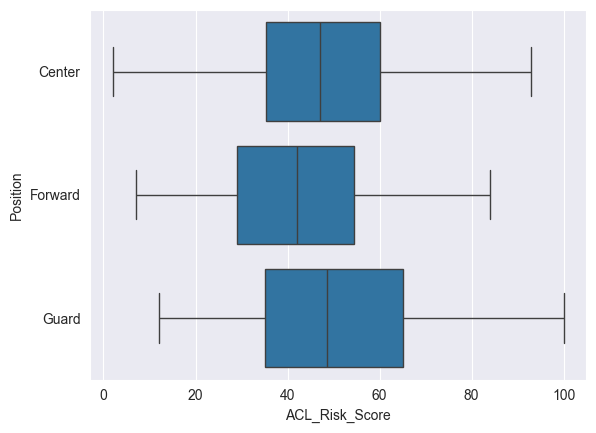

In [46]:
sns.boxplot(x='ACL_Risk_Score', y='Position', data=df)

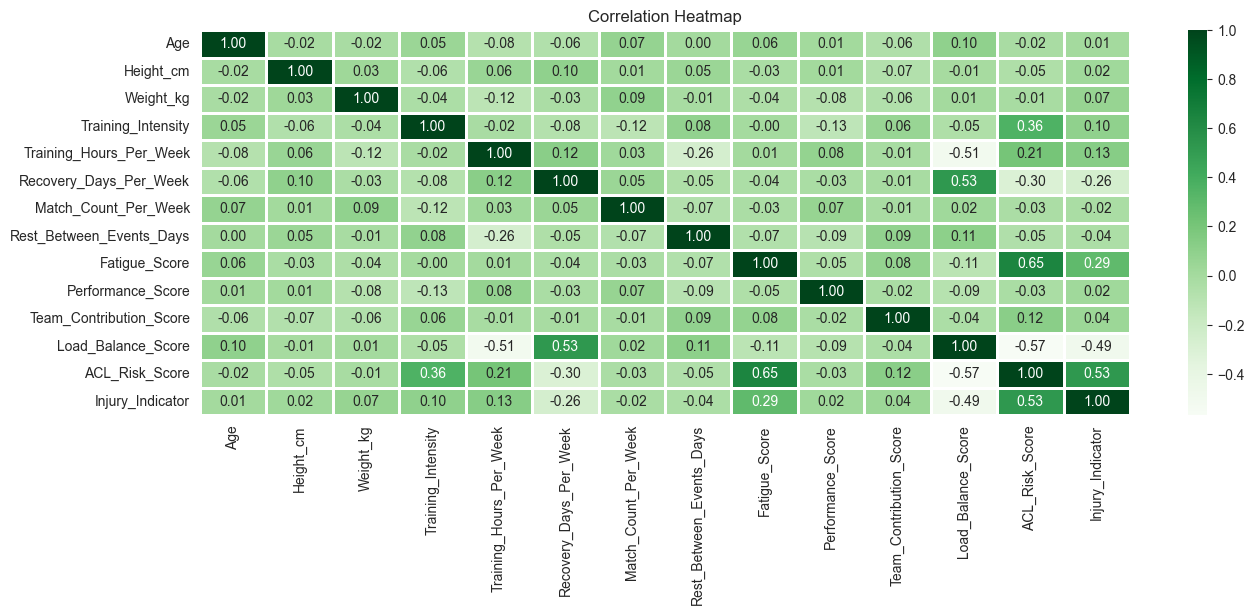

In [38]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Greens', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()



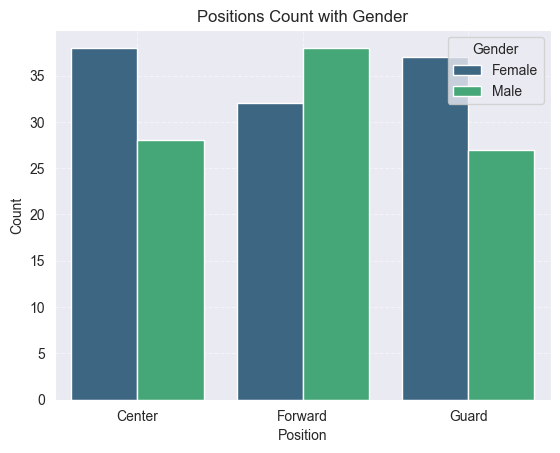

In [42]:
sns.countplot(x="Position",data=df, hue="Gender", palette="viridis")
plt.title("Positions Count with Gender")
plt.xlabel("Position")
plt.grid(alpha=0.5, linestyle='--')
plt.ylabel("Count")
plt.show()

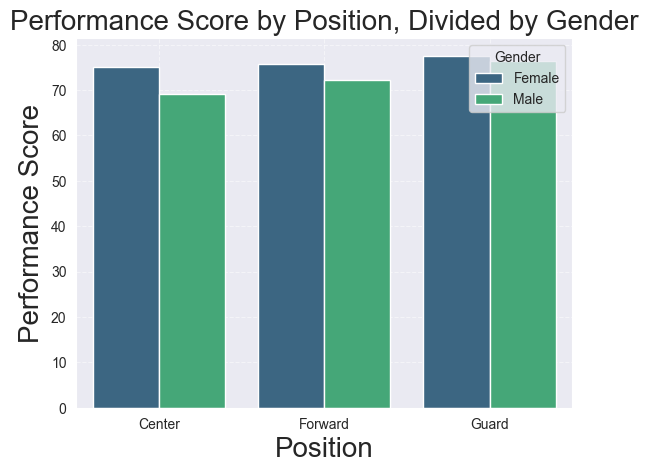

In [44]:
sns.barplot(x="Position", y="Performance_Score", hue="Gender", data=df, ci=None, palette="viridis")
plt.title("Performance Score by Position, Divided by Gender", fontsize=20)
plt.xlabel("Position", fontsize=20)
plt.ylabel("Performance Score", fontsize=20)
plt.grid(alpha=0.5, linestyle='--')
plt.show()